In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv("test_ver2.csv",dtype={"sexo":str,"ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str})

D:\Anaconda\envs\santander\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
target_cols = target_cols[2:]

In [1]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [3]:
import csv
import datetime
from operator import sub
import numpy as np
import pandas as pd
from sklearn import preprocessing, ensemble
from tqdm import tqdm

mapping_dict = {
'ind_empleado'  : {-99:0, 'N':1, 'B':2, 'F':3, 'A':4, 'S':5},
'sexo'          : {'V':0, 'H':1, -99:2},
'ind_nuevo'     : {'0':0, '1':1, -99:2},
'indrel'        : {'1':0, '99':1, -99:2},
'indrel_1mes'   : {-99:0, '1.0':1, '1':1, '2.0':2, '2':2, '3.0':3, '3':3, '4.0':4, '4':4, 'P':5},
'tiprel_1mes'   : {-99:0, 'I':1, 'A':2, 'P':3, 'R':4, 'N':5},
'indresi'       : {-99:0, 'S':1, 'N':2},
'indext'        : {-99:0, 'S':1, 'N':2},
'conyuemp'      : {-99:0, 'S':1, 'N':2},
'indfall'       : {-99:0, 'S':1, 'N':2},
'tipodom'       : {-99:0, '1':1},
'ind_actividad_cliente' : {'0':0, '1':1, -99:2},
'segmento'      : {'02 - PARTICULARES':0, '03 - UNIVERSITARIO':1, '01 - TOP':2, -99:2},
'pais_residencia' : {'LV': 102, 'BE': 12, 'BG': 50, 'BA': 61, 'BM': 117, 'BO': 62, 'JP': 82, 'JM': 116, 'BR': 17, 'BY': 64, 'BZ': 113, 'RU': 43, 'RS': 89, 'RO': 41, 'GW': 99, 'GT': 44, 'GR': 39, 'GQ': 73, 'GE': 78, 'GB': 9, 'GA': 45, 'GN': 98, 'GM': 110, 'GI': 96, 'GH': 88, 'OM': 100, 'HR': 67, 'HU': 106, 'HK': 34, 'HN': 22, 'AD': 35, 'PR': 40, 'PT': 26, 'PY': 51, 'PA': 60, 'PE': 20, 'PK': 84, 'PH': 91, 'PL': 30, 'EE': 52, 'EG': 74, 'ZA': 75, 'EC': 19, 'AL': 25, 'VN': 90, 'ET': 54, 'ZW': 114, 'ES': 0, 'MD': 68, 'UY': 77, 'MM': 94, 'ML': 104, 'US': 15, 'MT': 118, 'MR': 48, 'UA': 49, 'MX': 16, 'IL': 42, 'FR': 8, 'MA': 38, 'FI': 23, 'NI': 33, 'NL': 7, 'NO': 46, 'NG': 83, 'NZ': 93, 'CI': 57, 'CH': 3, 'CO': 21, 'CN': 28, 'CM': 55, 'CL': 4, 'CA': 2, 'CG': 101, 'CF': 109, 'CD': 112, 'CZ': 36, 'CR': 32, 'CU': 72, 'KE': 65, 'KH': 95, 'SV': 53, 'SK': 69, 'KR': 87, 'KW': 92, 'SN': 47, 'SL': 97, 'KZ': 111, 'SA': 56, 'SG': 66, 'SE': 24, 'DO': 11, 'DJ': 115, 'DK': 76, 'DE': 10, 'DZ': 80, 'MK': 105, -99: 1, 'LB': 81, 'TW': 29, 'TR': 70, 'TN': 85, 'LT': 103, 'LU': 59, 'TH': 79, 'TG': 86, 'LY': 108, 'AE': 37, 'VE': 14, 'IS': 107, 'IT': 18, 'AO': 71, 'AR': 13, 'AU': 63, 'AT': 6, 'IN': 31, 'IE': 5, 'QA': 58, 'MZ': 27},
'canal_entrada' : {'013': 49, 'KHP': 160, 'KHQ': 157, 'KHR': 161, 'KHS': 162, 'KHK': 10, 'KHL': 0, 'KHM': 12, 'KHN': 21, 'KHO': 13, 'KHA': 22, 'KHC': 9, 'KHD': 2, 'KHE': 1, 'KHF': 19, '025': 159, 'KAC': 57, 'KAB': 28, 'KAA': 39, 'KAG': 26, 'KAF': 23, 'KAE': 30, 'KAD': 16, 'KAK': 51, 'KAJ': 41, 'KAI': 35, 'KAH': 31, 'KAO': 94, 'KAN': 110, 'KAM': 107, 'KAL': 74, 'KAS': 70, 'KAR': 32, 'KAQ': 37, 'KAP': 46, 'KAW': 76, 'KAV': 139, 'KAU': 142, 'KAT': 5, 'KAZ': 7, 'KAY': 54, 'KBJ': 133, 'KBH': 90, 'KBN': 122, 'KBO': 64, 'KBL': 88, 'KBM': 135, 'KBB': 131, 'KBF': 102, 'KBG': 17, 'KBD': 109, 'KBE': 119, 'KBZ': 67, 'KBX': 116, 'KBY': 111, 'KBR': 101, 'KBS': 118, 'KBP': 121, 'KBQ': 62, 'KBV': 100, 'KBW': 114, 'KBU': 55, 'KCE': 86, 'KCD': 85, 'KCG': 59, 'KCF': 105, 'KCA': 73, 'KCC': 29, 'KCB': 78, 'KCM': 82, 'KCL': 53, 'KCO': 104, 'KCN': 81, 'KCI': 65, 'KCH': 84, 'KCK': 52, 'KCJ': 156, 'KCU': 115, 'KCT': 112, 'KCV': 106, 'KCQ': 154, 'KCP': 129, 'KCS': 77, 'KCR': 153, 'KCX': 120, 'RED': 8, 'KDL': 158, 'KDM': 130, 'KDN': 151, 'KDO': 60, 'KDH': 14, 'KDI': 150, 'KDD': 113, 'KDE': 47, 'KDF': 127, 'KDG': 126, 'KDA': 63, 'KDB': 117, 'KDC': 75, 'KDX': 69, 'KDY': 61, 'KDZ': 99, 'KDT': 58, 'KDU': 79, 'KDV': 91, 'KDW': 132, 'KDP': 103, 'KDQ': 80, 'KDR': 56, 'KDS': 124, 'K00': 50, 'KEO': 96, 'KEN': 137, 'KEM': 155, 'KEL': 125, 'KEK': 145, 'KEJ': 95, 'KEI': 97, 'KEH': 15, 'KEG': 136, 'KEF': 128, 'KEE': 152, 'KED': 143, 'KEC': 66, 'KEB': 123, 'KEA': 89, 'KEZ': 108, 'KEY': 93, 'KEW': 98, 'KEV': 87, 'KEU': 72, 'KES': 68, 'KEQ': 138, -99: 6, 'KFV': 48, 'KFT': 92, 'KFU': 36, 'KFR': 144, 'KFS': 38, 'KFP': 40, 'KFF': 45, 'KFG': 27, 'KFD': 25, 'KFE': 148, 'KFB': 146, 'KFC': 4, 'KFA': 3, 'KFN': 42, 'KFL': 34, 'KFM': 141, 'KFJ': 33, 'KFK': 20, 'KFH': 140, 'KFI': 134, '007': 71, '004': 83, 'KGU': 149, 'KGW': 147, 'KGV': 43, 'KGY': 44, 'KGX': 24, 'KGC': 18, 'KGN': 11}
}
cat_cols = list(mapping_dict.keys())

target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
target_cols = target_cols[2:]

def getTarget(row):
	tlist = []
	for col in target_cols:
		if row[col].strip() in ['', 'NA']:
			target = 0
		else:
			target = int(float(row[col]))
		tlist.append(target)
	return tlist

def getIndex(row, col):
	val = row[col].strip()
	if val not in ['','NA']:
		ind = mapping_dict[col][val]
	else:
		ind = mapping_dict[col][-99]
	return ind

def getAge(row):
	mean_age = 40.
	min_age = 20.
	max_age = 90.
	range_age = max_age - min_age
	age = row['age'].strip()
	if age == 'NA' or age == '':
		age = mean_age
	else:
		age = float(age)
		if age < min_age:
			age = min_age
		elif age > max_age:
			age = max_age
	return round( (age - min_age) / range_age, 4)

def getCustSeniority(row):
	min_value = 0.
	max_value = 256.
	range_value = max_value - min_value
	missing_value = 0.
	cust_seniority = row['antiguedad'].strip()
	if cust_seniority == 'NA' or cust_seniority == '':
		cust_seniority = missing_value
	else:
		cust_seniority = float(cust_seniority)
		if cust_seniority < min_value:
			cust_seniority = min_value
		elif cust_seniority > max_value:
			cust_seniority = max_value
	return round((cust_seniority-min_value) / range_value, 4)

def getRent(row):
	min_value = 0.
	max_value = 1500000.
	range_value = max_value - min_value
	missing_value = 101850.
	rent = row['renta'].strip()
	if rent == 'NA' or rent == '':
		rent = missing_value
	else:
		rent = float(rent)
		if rent < min_value:
			rent = min_value
		elif rent > max_value:
			rent = max_value
	return round((rent-min_value) / range_value, 6)

def processData(in_file_name, cust_dict):
	x_vars_list = []
	y_vars_list = []
	for row in tqdm(csv.DictReader(in_file_name)):
		# use only the four months as specified by breakfastpirate #
		if row['fecha_dato'] not in ['2015-05-28', '2015-06-28', '2016-05-28', '2016-06-28']:
			continue

		cust_id = int(row['ncodpers'])
		if row['fecha_dato'] in ['2015-05-28', '2016-05-28']:	
			target_list = getTarget(row)
			cust_dict[cust_id] =  target_list[:]
			continue

		x_vars = []
		for col in cat_cols:
			x_vars.append( getIndex(row, col) )
		x_vars.append( getAge(row) )
		x_vars.append( getCustSeniority(row) )
		x_vars.append( getRent(row) )

		if row['fecha_dato'] == '2016-06-28':
			prev_target_list = cust_dict.get(cust_id, [0]*22)
			x_vars_list.append(x_vars + prev_target_list)
		elif row['fecha_dato'] == '2015-06-28':
			prev_target_list = cust_dict.get(cust_id, [0]*22)
			target_list = getTarget(row)
			new_products = [max(x1 - x2,0) for (x1, x2) in zip(target_list, prev_target_list)]
			if sum(new_products) > 0:
				for ind, prod in enumerate(new_products):
					if prod>0:
						assert len(prev_target_list) == 22
						x_vars_list.append(x_vars+prev_target_list)
						y_vars_list.append(ind)

	return x_vars_list, y_vars_list, cust_dict



start_time = datetime.datetime.now()
train_file =  open("train_ver2.csv")
x_vars_list, y_vars_list, cust_dict = processData(train_file, {})
train_X = np.array(x_vars_list)
train_y = np.array(y_vars_list)
print(np.unique(train_y))
del x_vars_list, y_vars_list
train_file.close()
print(train_X.shape, train_y.shape)
print(datetime.datetime.now()-start_time)
test_file = open("test_ver2.csv")
x_vars_list, y_vars_list, cust_dict = processData(test_file, cust_dict)

13647309it [02:57, 76928.20it/s] 
0it [00:00, ?it/s]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
(45679, 40) (45679,)
0:02:57.638015


929615it [00:21, 43742.92it/s]


In [4]:
x_vars = np.array(x_vars_list)
y_vars = np.array(y_vars_list)

In [19]:
train_y

array([ 0, 21, 19, ..., 21, 16, 15])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.multioutput import MultiOutputClassifier
from time import time

# xtrain, xtest, ytrain, ytest=train_test_split(X_cls,Y_cls, train_size=0.8, random_state=0)
# svc = SVC(gamma="scale", verbose=True)
# reg = LogisticRegression(random_state=0, verbose=1)
# model = RandomForestClassifier(max_depth=6, random_state=0, n_jobs=2, verbose=1)
t0 = time()
# model = MultiOutputClassifier(estimator=clf)
model =RidgeClassifierCV(cv=5)
model.fit(train_X, train_y)
dt = time() - t0
print("done in {}".format(dt))

D:\Anaconda\envs\santander\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


done in 3.6502037048339844


In [53]:
model.alpha_

10.0

In [26]:
probas = model.decision_function(x_vars)

In [29]:
model.score(train_X, train_y)

0.5219247356553339

In [27]:
probas[0]

array([-0.63774332, -0.99778934, -0.92966018, -1.00236276, -0.97295598,
       -0.97504269, -0.99588045, -0.94345963, -1.00041679, -0.92489637,
       -0.95533513, -0.99308255, -0.98328065, -0.99749967, -0.99680428,
       -0.80375653, -1.20300773, -1.00740144, -0.9996206 , -1.02933477,
       -0.74505018,  0.09438102])

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0, verbose=1, learning_rate=0.01, min_weight_fraction_leaf=0.1, max_depth=16, subsample=0.5, max_features=0.7,n_iter_no_change=50, n_estimators=1000)
GB.fit(train_X, train_y)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       43719.2718         261.6058           25.30m
         2       43331.2487         265.2419           27.18m
         3       43245.4887         216.6919           27.52m
         4       42876.7016         220.5335           27.62m
         5       42504.1513         241.8118           27.73m
         6       42482.5891         213.7966           28.25m
         7       42433.2100         192.4207           28.27m
         8       42028.2745         221.3348           28.14m
         9       41959.8554         200.4644           28.08m
        10       41609.3405         198.8984           28.19m
        20       39860.5168         170.7636           27.93m
        30       38531.7754         127.8858           27.06m
        40       37086.3627         102.8941           26.35m
        50       36050.8671         100.2260           25.52m
        60       35210.1563          79.8071           24.25m
       

GradientBoostingClassifier(learning_rate=0.01, max_depth=16, max_features=0.7,
                           min_weight_fraction_leaf=0.1, n_estimators=1000,
                           n_iter_no_change=50, random_state=0, subsample=0.5,
                           verbose=1)

In [38]:
probas = GB.predict_proba(x_vars)

In [39]:
GB.score(train_X, train_y)

0.5467501477703102

In [40]:
probas = np.argsort(probas)[::-1][:,:7].astype(np.uint)

test_id = np.array(pd.read_csv("test_ver2.csv", usecols=['ncodpers'])['ncodpers'])
# final_preds = [" ".join(list(target_cols[pred])) for pred in probas]
final_preds = [" ".join([target_cols[p] for p in pred ]) for pred in probas]
out_df = pd.DataFrame({'ncodpers':test_id, 'added_products':final_preds})
out_df.to_csv('gb1000.csv', index=False)

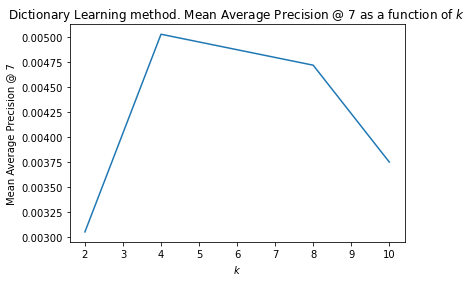

In [57]:
import matplotlib.pyplot as plt
plt.plot([2,4,8, 10], [0.00305,0.00503,0.00472, 0.00375])
plt.title("Dictionary Learning method. Mean Average Precision @ 7 as a function of $k$")
plt.ylabel("Mean Average Precision @ 7")
plt.xlabel("$k$")
plt.savefig("dico_k_rel.png")